===== Random Forest Results =====
Accuracy: 0.4430379746835443

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         2
           8       0.57      0.57      0.57         7
           9       0.00      0.00      0.00         6
          10       0.50      0.73      0.59        11
          11       0.60      0.60      0.60        10
          12       0.17      0.17      0.17         6
          13       0.25      0.17      0.20         6
          14       0.22      0.40      0.29         5
          15       0.30      0.43      0.35         7
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1
          18       1.00      0.50      0.67         2
          19       0.00      0.00      0.00    

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


===== XGBoost Results =====
Accuracy: 0.4051

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         2
           8       0.29      0.29      0.29         7
           9       0.00      0.00      0.00         6
          10       0.46      0.55      0.50        11
          11       0.45      0.50      0.48        10
          12       0.00      0.00      0.00         6
          13       0.50      0.17      0.25         6
          14       0.25      0.60      0.35         5
          15       0.29      0.29      0.29         7
          16       0.50      0.33      0.40         3
          17       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         1

    accura

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

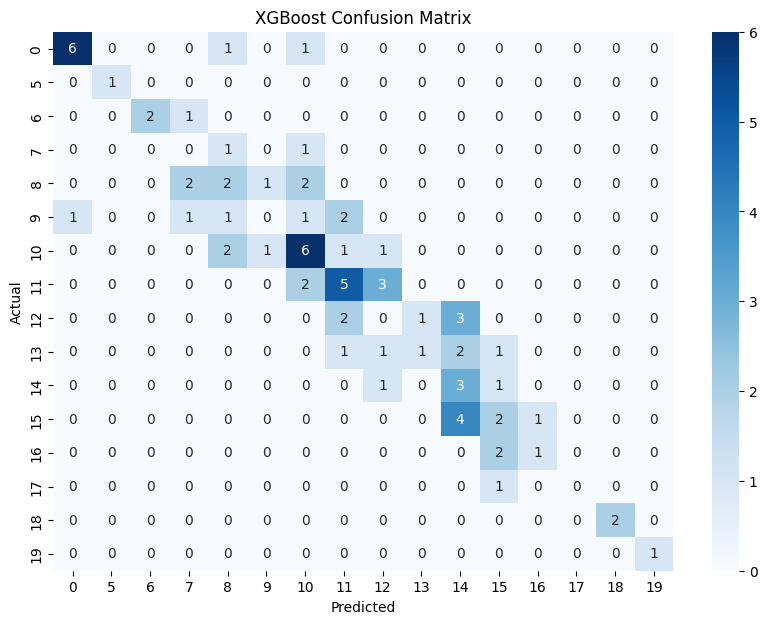

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 


===== Logistic Regression Results =====
Accuracy: 0.2025

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       1.00      0.14      0.25         7
           9       0.00      0.00      0.00         6
          10       0.30      0.55      0.39        11
          11       0.09      0.10      0.10        10
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1
          18       0.50      0.50      0.50         2
          19       0.00      0.00      0.00         1

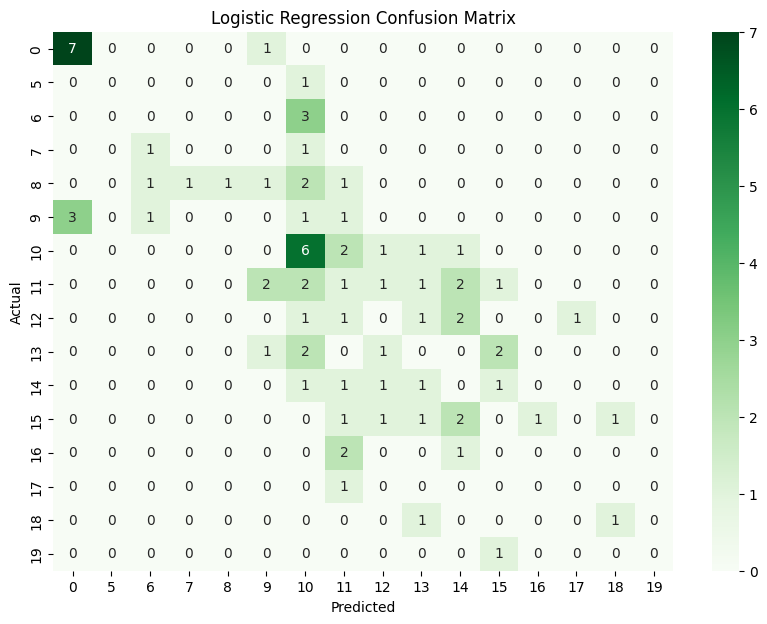

In [29]:
# Importing necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# loading and filtering the dataset.
# Loading encoded dataset.
df_encoded = pd.read_csv(r'c:\Users\HP\OneDrive\Desktop\Projects\Students-Performance-Predictor\Data\processed\student-mat-encoded.csv')

# Dropping classes with fewer than 5 instances.
class_counts = df_encoded['G3'].value_counts()
valid_classes = class_counts[class_counts >= 5].index
df_filtered = df_encoded[df_encoded['G3'].isin(valid_classes)]

# Feature & Target Splitting.
X = df_filtered.drop('G3', axis=1)
y = df_filtered['G3']


###RANDOM FOREST MODEL
# Train-test split.
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initializing and training Random Forest.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predicting and evaluating Random Forest model.
y_pred_rf = rf_model.predict(X_test_rf)
print("===== Random Forest Results =====")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_rf, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))


###XGBOOST MODEL
# Encoding class labels to 0,1,2,...
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split.
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Initializing and training XGBoost model.
# Note: XGBoost requires the target to be in numerical format.
# The 'num_class' parameter is set to the number of unique classes in the target variable.
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predicting and decoding predictions.
y_pred_xgb = xgb_model.predict(X_test_xgb)
y_test_labels = le.inverse_transform(y_test_xgb)
y_pred_labels = le.inverse_transform(y_pred_xgb)

# Evaluating XGBoost model.
print("\n===== XGBoost Results =====")
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion matrix for XGBoost model.
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###LOGISTIC REGRESSION MODEL
# Train-test splitting using encoded labels.
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Initializing and training Logistic Regression.
lr_model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear', random_state=42)
lr_model.fit(X_train_lr, y_train_lr)

# Predicting and decoding predictions.
y_pred_lr = lr_model.predict(X_test_lr)
y_test_labels_lr = le.inverse_transform(y_test_lr)
y_pred_labels_lr = le.inverse_transform(y_pred_lr)

# Evaluating Logistic Regression model.
print("\n===== Logistic Regression Results =====")
print(f"Accuracy: {accuracy_score(y_test_labels_lr, y_pred_labels_lr):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_labels_lr, y_pred_labels_lr))

# Confusion matrix for Logistic Regression model.
conf_matrix_lr = confusion_matrix(y_test_labels_lr, y_pred_labels_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
